# Analysis

This notebook demonstrates the analysis and visualization features of SpringSaLaDpy

In [1]:
from SpringSaLaDpy.Visualization import *
from SpringSaLaDpy.display_info import *
from SpringSaLaDpy.Project_reader import Describe_input_file
from SpringSaLaDpy.MolDraw.MolDraw_exec import display_molecules
from SpringSaLaDpy.format_directory import format_directory

## Create search_directory

Create the relative path to a SIMULATIONS or FOLDER directory created by SpringSaLaD (called search_directory in this notebook). This is the location of the data that will be used for analysis and visualization. Therefore, search_directory is a required argument for the rest of the functions in this notebook. Since a FOLDER directory is required for the following code, use format_directory() to automatically find the associated FOLDER directory one level below a SIMULATIONS directory.

In [2]:
search_directory = os.path.join('GUI_results', 'Nephrin-Nck-NWasp', 'Final_version_test_SIMULATIONS', 'Simulation0_SIM_SIMULATIONS')

search_directory = format_directory(search_directory)
print(search_directory)

GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER


## Describe Input File

Looks for a .txt file in the search_directory and displays a summary of its data. If there are multiple .txt files that match the search criteria, a warning will be displayed. Note that state information is only displayed if that site type has multiple states available.

### Options:
- **search_term**: The selected file must have this string as part of its name (default '' means the last .txt file in the directory will be selected)
- **links**: Display the links between sites within each molecule (default False)
- **reactions**: Display the molecule, site, and state information for all of the reactions (default False)
- **kinetics**: Display initial molecule counts and reaction rates (default False)
- **drawings**: Display a 2D projection of each molecule onto the XY plane with proper site sizes, colors, and links (default False)

Molecules:

MOLECULE: "NWASP" (Initial Count: 10)


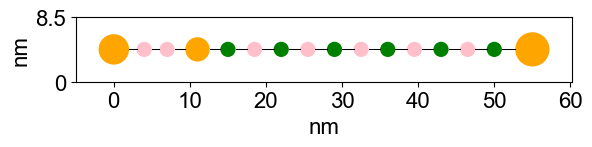

This molecule has 5 site types: dom1, linker, PRM, dom3, dom2

It consists of 16 connected sites:
Type PRM: 6 Green intracellular sites (Site 0, Site 2, Site 4, Site 6, Site 8, Site 10)
Type linker: 7 Pink intracellular sites (Site 1, Site 3, Site 5, Site 7, Site 9, Site 14, Site 15)
Type dom1: 1 Orange intracellular site (Site 11)
Type dom3: 1 Orange intracellular site (Site 12)
Type dom2: 1 Orange intracellular site (Site 13)

It has 15 total links between sites:
Site 0 is connected to site 13, site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1, site 3
Site 3 is connected to site 2, site 4
Site 4 is connected to site 3, site 5
Site 5 is connected to site 4, site 6
Site 6 is connected to site 5, site 7
Site 7 is connected to site 6, site 8
Site 8 is connected to site 7, site 9
Site 9 is connected to site 8, site 10
Site 10 is connected to site 9, site 12
Site 11 is connected to site 14
Site 12 is connected to site 10
Site 13 is connected to site 15, site 0
Site

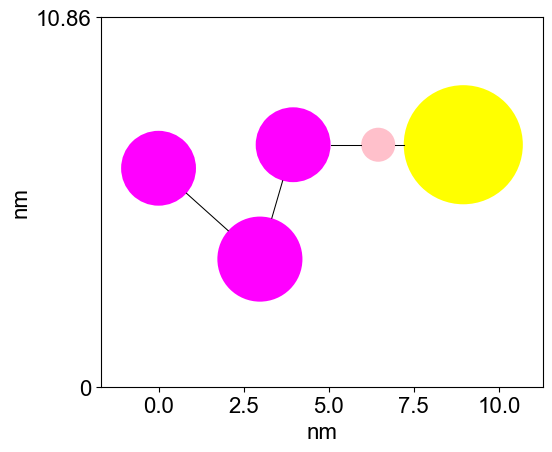

This molecule has 5 site types: SH3_1, SH3_2, SH3_3, SH2, linker

It consists of 5 connected sites:
Type SH3_1: 1 Magenta intracellular site (Site 0)
Type SH3_2: 1 Magenta intracellular site (Site 1)
Type SH3_3: 1 Magenta intracellular site (Site 2)
Type SH2: 1 Yellow intracellular site (Site 3)
Type linker: 1 Pink intracellular site (Site 4)

It has 4 total links between sites:
Site 0 is connected to site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1, site 4
Site 3 is connected to site 4
Site 4 is connected to site 2, site 3
------------------------------------------------------------------------------------------------------------

MOLECULE: "NEPHRIN" (Initial Count: 6)


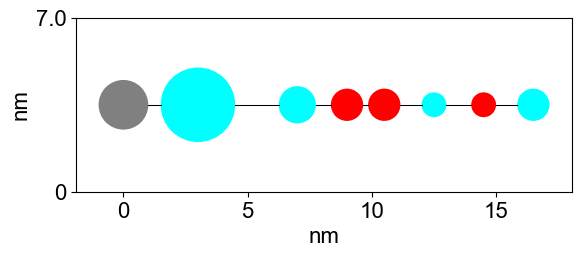

This molecule has 7 site types: dom1, Anchor, dom2, pTyr_1_2, linker, lin_dom, pTyr_3

It consists of 8 connected sites:
Type Anchor: 1 Gray membrane site (Site 0)
Type dom1: 1 Cyan intracellular site (Site 1)
Type dom2: 1 Cyan intracellular site (Site 2)
Type pTyr_1_2: 2 Red intracellular sites (Site 3, Site 4)
Type linker: 1 Cyan intracellular site (Site 5)
Type pTyr_3: 1 Red intracellular site (Site 6)
Type lin_dom: 1 Cyan intracellular site (Site 7)

It has 7 total links between sites:
Site 0 is connected to site 1
Site 1 is connected to site 0, site 2
Site 2 is connected to site 1, site 3
Site 3 is connected to site 2, site 4
Site 4 is connected to site 3, site 5
Site 5 is connected to site 4, site 6
Site 6 is connected to site 5, site 7
Site 7 is connected to site 6
------------------------------------------------------------------------------------------------------------

***********************************************************************************************************

In [3]:
Describe_input_file(search_directory, search_term='', links=True, reactions=True, kinetics=True, drawings=True)

## 3D Simulation Viewer

View the 3D positions of all the sites and links at a specific set of times. Note that if you run this function in a Python script (outside a Jupyter Notebook) it will be displayed in an interactive form in a new window.

### Options:
- run: the simulation run used for visualization (default 0)
- times: each time in the list is used for visualization in its own plot (default [] only picks the last available time point)
- view: list that describes the angle of camera in elevation, azimuth, and roll in that order (default [] looks at the scene from the +X +Y +Z corner)
- site_scale: scale factor applied to the sizes of each site (default 10)
- link_thickness: thickness of the links between sites (default 0.75)
- depth_fade: boolean that fades out sites further from the camera when True (default True)

Warning, the provided time 0.005 has been rounded to the closest available value: 0.004


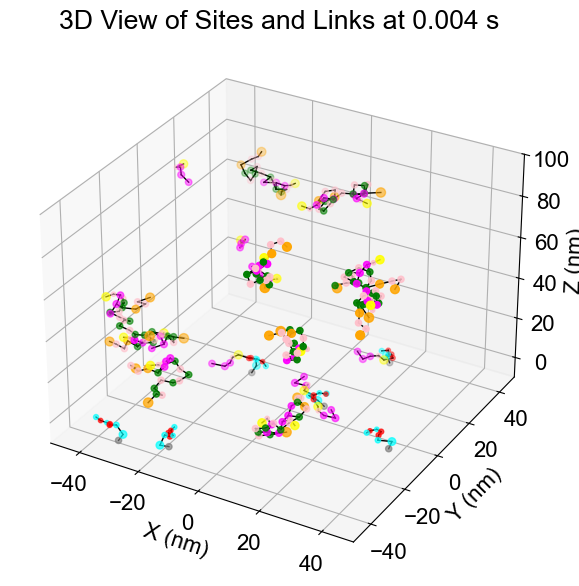

In [4]:
Spatial_Analysis.scatter_3d(search_directory, run=0, times=[0.005], view=[], site_scale=20, link_thickness=1, depth_fade=True)

## Average Clustering Time Course

### Options
- mode: Selects the clustering variable being plotted
    - ACO: Average Cluster Occupancy
    - ACS: Average Cluster Size 
- fill: displays 1 standard deviation bounds (default False). Note this option is only available in ACO mode.


GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER
TimeCourse_calc : [****************************************] 100%
Done
Execution time : 0.2674 secs


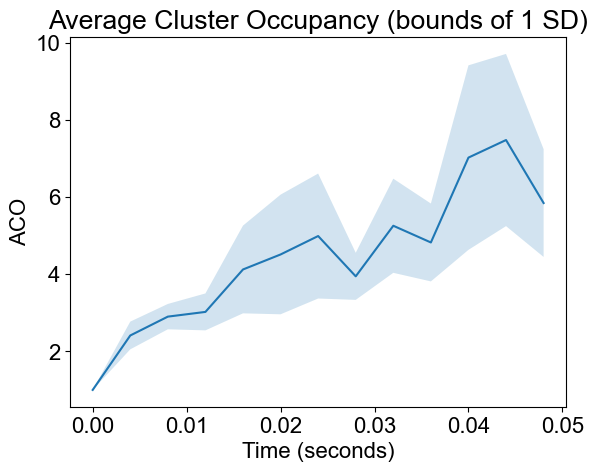

In [5]:
clustering.plot(search_directory, mode='ACO', fill=True)

## Time Courses for Molecules, Bonds, and Sites

### Options:
- **data_selection**: pick the file that will be used for plotting
    - 'FullBondData.csv' number of each type of bond between molecular sites
    - 'FullCountData.csv' number of each type of molecule grouped by FREE, BOUND, and TOTAL (default)
    - 'FullStateCountData.csv' number of each site in each state grouped by FREE, BOUND, and TOTAL
- **indices**: pick the columns that will be graphed over time by passing in a list of integers (it displays all columns by default)
- **list_options**: prints the available columns and their corresponding indices (default True)
- **legend_right**: displays the legend off to the side of the plot (default True)
- **fill**: displays one standard deviation bounds (default True)

Getting molecular counts...
Wrote data! Output Directory: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/Count_stat
Columns:
0: TOTAL NWASP
1: FREE NWASP
2: BOUND NWASP
3: TOTAL NCK
4: FREE NCK
5: BOUND NCK
6: TOTAL NEPHRIN
7: FREE NEPHRIN
8: BOUND NEPHRIN

List of indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8]


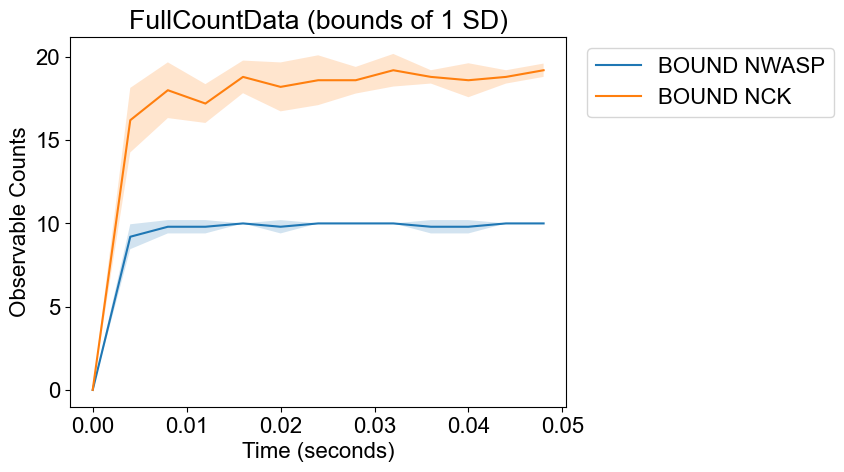

In [6]:
Counter.plot(search_directory, data_selection='FullCountData', indices=[2,5], list_options=True, legend_right=True, fill=True)

# Average Z Position Time Courses

Find the average position z position of a set of sites that have some property in common (e.g. all sites that belong to the same type of molecule). Note that the plane z=0 is the membrane itself.

### Options:
- **mode**: pick what type of data will be plotted
    - 'mol' any molecular site that's part of a particular molecule (default)
    - 'color' any molecular site of a particular color irrespective of the molecule the site belongs to
    - 'site' any molecular site
- **indices**: pick the columns that will be graphed over time by passing in a list of integers (it displays all columns by default)
- **list_options**: prints the available columns and their corresponding indices (default True)
- **verbose**: displays both the site name and its corresponding molecule in the legend for color or site mode (default False)
- **legend_right**: displays the legend off to the side of the plot (default True)
- **fill**: displays one standard deviation bounds (default True)

Molecules:
0: NWASP
1: NCK
2: NEPHRIN

List of indices:
[0, 1, 2]
Progress : [****************************************] 100.0%
Wrote chart data! Output File: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/3D_stat/average_positions.txt


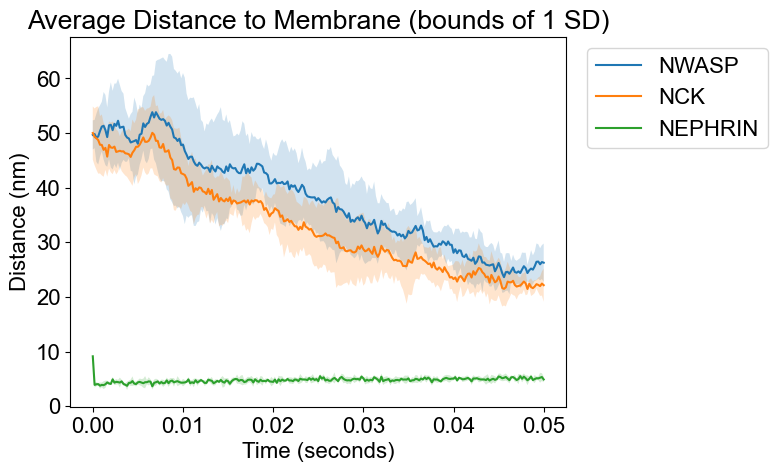

In [7]:
Average_z_pos.plot(search_directory, mode='mol', indices=[], list_options=True, verbose=False, legend_right=True, fill=True)

## Cluster Size Distribution

Fraction of total molecules for clusters that are a specific size (or size range).

### Options:
- **times**: list of all the time points that will be used for plotting (default [] picks the last available time point)
- **bins**: list of the edges of the bins (default is no bins)
- **mode**: The variable used for the height of each cluster size
    - foTM: Fraction of total moleclues that exist at this cluster size (default)
    - frequency: Number of clusters at a given size over the total number of clusters

Warning, the provided time 0.005 has been rounded to the closest available value: 0.004
Distribution_calc : [****************************************] 100%
Execution time : 0.0091 secs


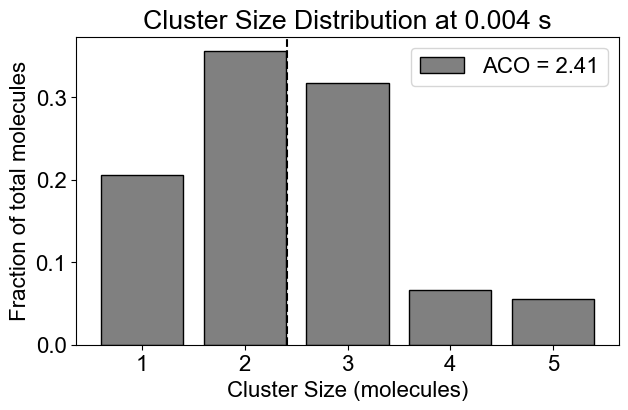

In [8]:
Histogram.plot(search_directory, times=[0.005], bins=[], mode='foTM')

## Cluster Composition

Average frequency of molecule types at different cluster sizes.

### Options:
- **times**: list of all the time points that will be used for plotting (default [] picks the last available time point)
- **special_clusters**: list of sizes to be displayed (default [] displays all cluster sizes)
- **width**: width of each bar on the chart (default 0.1)
- **alpha**: opacity of each bar on the chart (default 0.6)
- **legend_right**: displays the legend off to the side of the plot (default True)

Warning, the provided time 0.005 has been rounded to the closest available value: 0.004
Distribution_calc : [****************************************] 100%
Execution time : 0.0081 secs


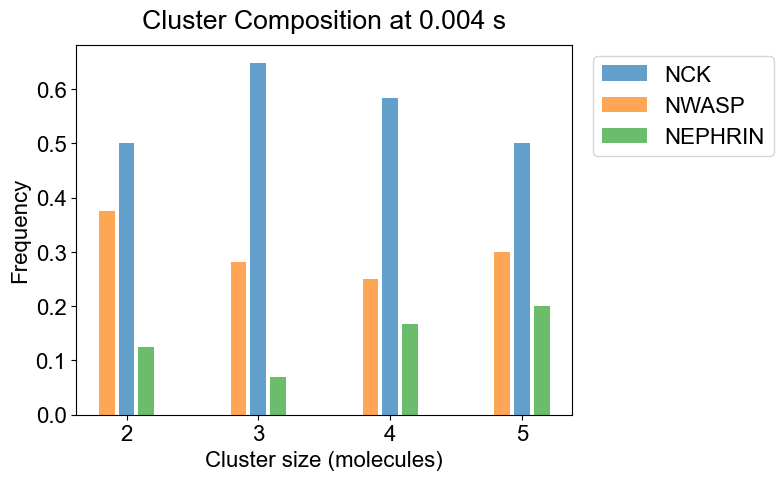

In [9]:
Composition.plot(search_directory, times=[0.005], special_clusters=[], width=0.12, alpha=.7, legend_right=True)

## Radius of Gyration Scatter Plot

Scatter plot of radius of gyration vs cluster size at a particular set of times.

### Options:
- **times**: list of all the time points that will be used for plotting (default [] picks the last available time point)
- **size_threshold**: only analyze clusters with more molecules than the threshold value (default 1)
- **cubic_com**: controls how the mass of each site is approximated when calculating the center of mass of the cluster
    - True: mass of each site is proportional to the cube of its radius (default)
    - False: all sites have the same mass


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100.0%
Wrote chart data! Output File: GUI_results/Nephrin-Nck-NWasp/Final_version_test_SIMULATIONS/Simulation0_SIM_SIMULATIONS/Simulation0_SIM_FOLDER/pyStat/BF_stat/radius_of_gyration.txt


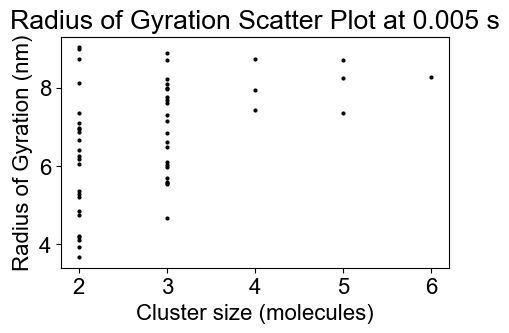

Execution time : 0.4035 secs


In [10]:
Spatial_Analysis.scatter_plot(search_directory, times=[0.005], size_threshold=1, cubic_com=True)

## Bonds per Molecule Histogram

Frequency of the number of bonds per molecule for a specific set of molecules. 

### Options:
- **times**: list of all the time points that will be used for plotting (default [] picks the last available time point)
- **size_threshold**: only analyze clusters with more molecules than the threshold value (default 1)
- **indices**: list of integers that selects the molecules used in the histogram (default [] plots all molecules)


System:  Simulation0
Calculating Cluster Density ...
Progress : [****************************************] 100.0%
Molecules:
0: NWASP
1: NCK
2: NEPHRIN

List of Indices:
[0, 1, 2]
Wrote chart data! Output File: GUI_results/Nephrin-Nck-NWasp/Final_version_test_SIMULATIONS/Simulation0_SIM_SIMULATIONS/Simulation0_SIM_FOLDER/pyStat/BF_stat/histogram.txt


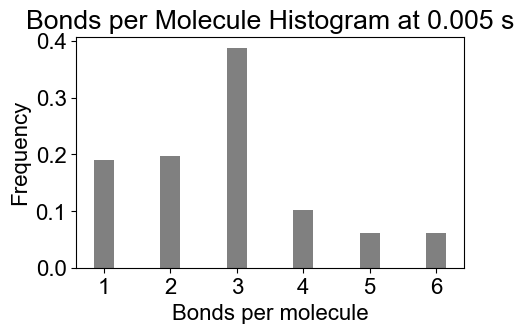

Execution time : 0.4117 secs


In [11]:
Spatial_Analysis.histogram(search_directory, times=[0.005], size_threshold=1, indices=[])

## Bound Fraction

Fraction of sites bound in clusters of all sizes. Each point is a set of clusters with a given size and bound fraction. The color of each point corresponds to the frequency of this cluster type.

### Options:
- **times**: list of all the time points that will be used for plotting (default [] picks the last available time point)
- **size_threshold_mean**: only clusters greater than this size will be included in the mean on the scatter plot (default 1)
- **grouping**: defines the value of the denominator when calculating frequency represented in the color of each point
    - 'all' frequency is number of clusters with a given bound fraction and cluster size / number of all the clusters (default)
    - 'col' frequency is number of clusters with a given bound fraction and cluster size / number clusters of the same size
- **hist**: Displays histogram of Bound Fraction (bound sites / free sites). Note that because the frequency in this plot is calculated with the total number of clusters, it doesn't get displayed in grouping='col' mode even if hist=True (default False)


Class : CrossLinkIndex
System : GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER\Simulation0_SIM.txt
Calculating SI ...
Progress : [****************************************] 100.0%
Complete Trajectories : 5
CS array: 53
SI_array: 53
Execution time : 0.5061 secs
Wrote chart data! Output File: GUI_results/Nephrin-Nck-NWasp/Final_version_test_SIMULATIONS/Simulation0_SIM_SIMULATIONS/Simulation0_SIM_FOLDER/pyStat/SI_stat/Bound_fraction.txt


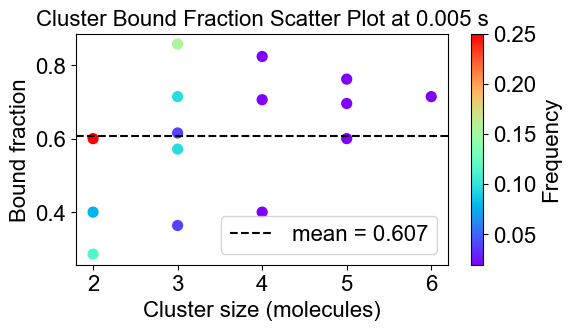

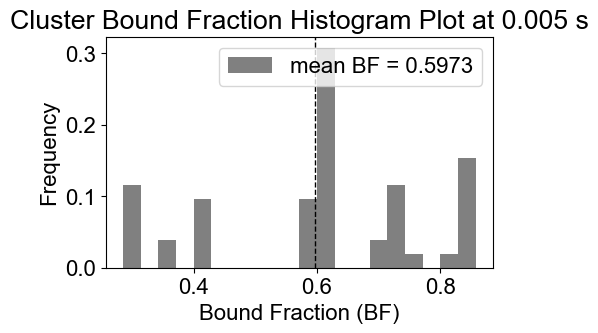

In [12]:
Bound_fraction.plot(search_directory, times=[0.005], size_threshold_mean=1, grouping='all', hist=True)

## Cluster Property Time Courses

Four types of time courses are displayed. They are radius of gyration, cluster size (number of molecules in a cluster), cluster radius (furthest site relative to the center of the cluster), and mass distribution coefficient (radius of gyration / cluster radius). Note that this visualization uses all the clusters at a given time when taking the minimum, mean, and average as opposed to doing those operations on each run and averaging over all runs.

### Options:
- **indices**: list that describes what data gets plotted (default [] plots all three)
    - 0 for minimum
    - 1 for average
    - 2 for maximum
- **size_threshold**: only analyze clusters with more molecules than the threshold value (default 1)
- **legend_right**: displays the legend off to the side of the plot (default True)
- **cubic_com**: controls how the mass of each site is approximated when calculating the center of mass of the cluster
    - True: mass of each site is proportional to the cube of its radius (default)
    - False: all sites have the same mass
- **reference_shapes**: display horizontal lines showing the mass distribution coefficient of familiar shapes on the last graph (default False)

Progress : [****************************************] 100.0%
Wrote chart data! Output File: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/3D_stat/Radius_of_Gyration.txt


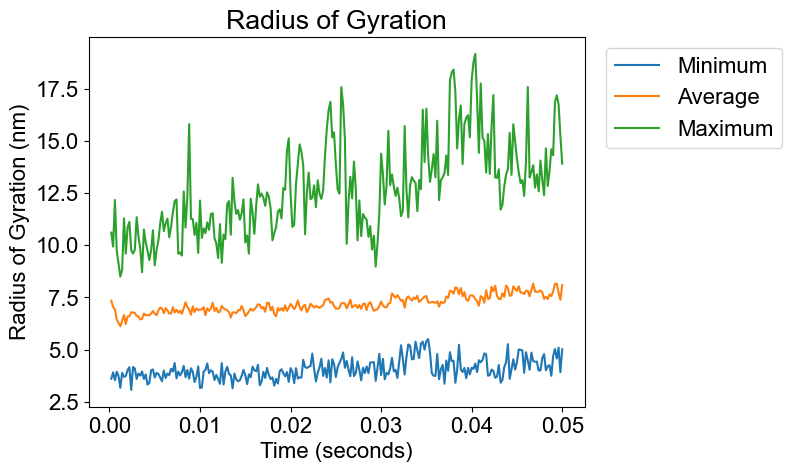

Wrote chart data! Output File: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/3D_stat/Cluster_Size.txt


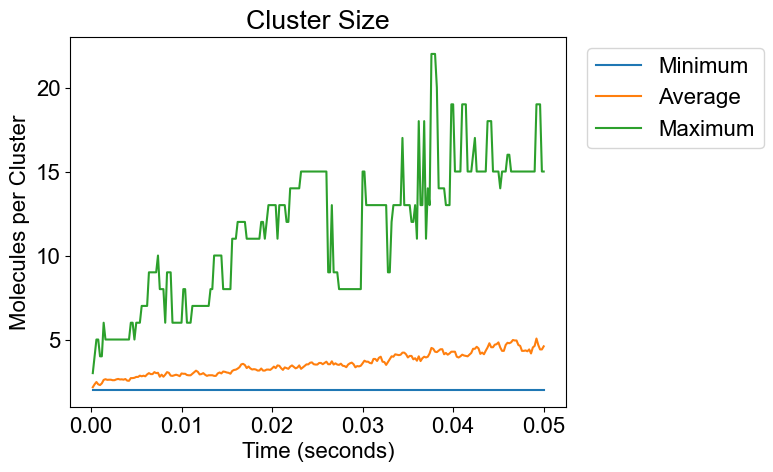

Wrote chart data! Output File: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/3D_stat/Cluster_Radius.txt


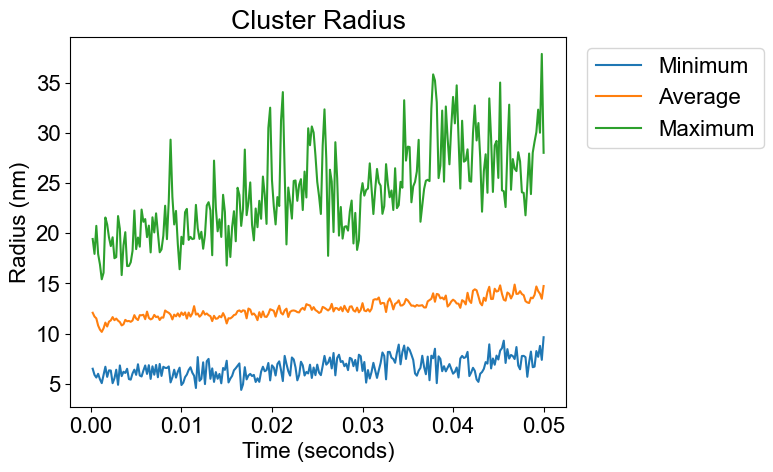

Wrote chart data! Output File: GUI_results\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_SIMULATIONS\Simulation0_SIM_FOLDER/pyStat/3D_stat/Mass_Distribution.txt


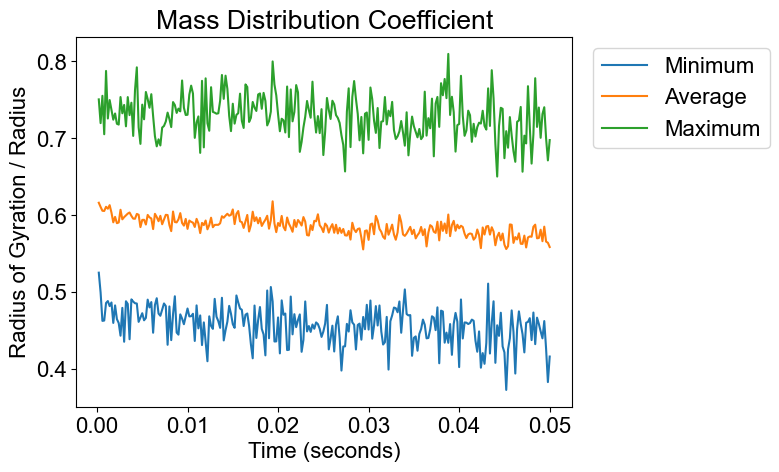

In [13]:
Spatial_Analysis.time_course(search_directory, indices=[], size_threshold=1, legend_right=True, cubic_com=True, reference_shapes=True)